In [5]:
def check_anagram(s1, s2):
    if( sorted(s1) != sorted(s2) ): 
        print("It is not anagram")
    else:
        print("It is anagram")

String1 = input("Enter input string 1 = ")
String2 = input("Enter input string 2 = ")
check_anagram(String1,String2)

Enter input string 1 = debit card
Enter input string 2 = bad credit
It is anagram


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('student-data.csv')

In [3]:
df = df.drop('address',axis=1)
df = df.drop('famsize',axis=1)
df = df.drop('Pstatus',axis=1)
df = df.drop(['Mjob','Fjob','reason','guardian'],axis=1)
df = df.drop(['schoolsup','famsup','nursery','romantic','famrel','freetime','goout','Dalc','Walc'],axis=1)

In [4]:
df = df.drop('school',axis=1)

In [5]:
sex = pd.get_dummies(df['sex'],drop_first=True)

In [6]:
df = df.drop('sex',axis=1)
df = pd.concat([df,sex],axis=1)

In [7]:
course = pd.get_dummies(df['paid'],drop_first=True)

df = df.drop('paid',axis=1)
df = pd.concat([df,course],axis=1)

In [8]:
df.rename(columns={'yes':'course'}, 
                 inplace=True)

In [9]:
internships = pd.get_dummies(df['activities'],drop_first=True)

df = df.drop('activities',axis=1)
df = pd.concat([df,internships],axis=1)

df.rename(columns={'yes':'internships'}, 
                 inplace=True)


In [10]:
df = df.drop(['higher','internet'],axis=1)

In [11]:
passed = pd.get_dummies(df['passed'],drop_first=True)

df = df.drop('passed',axis=1)
df = pd.concat([df,passed],axis=1)

df.rename(columns={'yes':'passed'}, 
                 inplace=True)

In [12]:
df=df.drop(['health','Medu','Fedu','age','traveltime','studytime'],axis=1)


In [13]:
df

,failures,absences,M,course,internships,passed
0,0,6,0,0,0,0
1,0,4,0,0,0,0
2,3,10,0,1,0,1
3,0,2,0,1,1,1
4,0,4,0,1,0,1
5,0,10,1,1,1,1
6,0,0,1,0,0,1
7,0,6,0,0,0,0
8,0,0,1,1,0,1
9,0,0,1,1,1,1


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

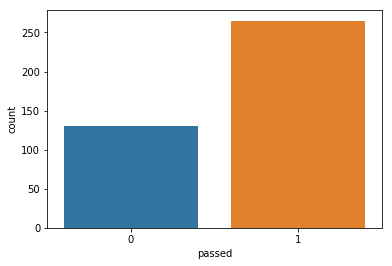

In [15]:
sns.countplot(x='passed',data=df)

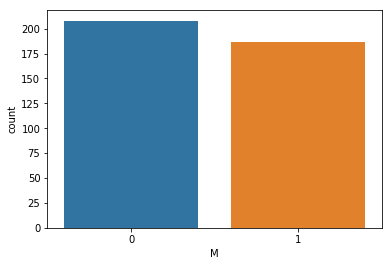

In [16]:
sns.countplot(x='M',data=df)

C:\Users\Home\Anaconda3\lib\site-packages\seaborn\categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


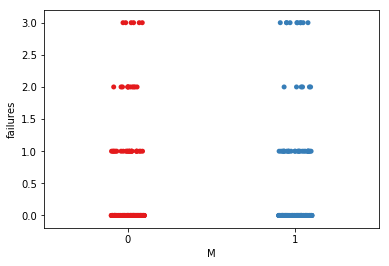

In [17]:
sns.stripplot(x="M", y="failures", data=df,jitter=True,palette='Set1',split=True)

C:\Users\Home\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


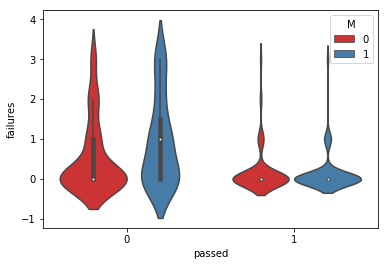

In [18]:
sns.violinplot(x="passed", y="failures", data=df,hue='M',palette='Set1')

In [19]:
n_students = df.shape[0]
n_features = df.shape[1] - 1 # the target column is not a feature column
n_passed = df[df['passed']==1].shape[0]
n_failed = df[df['passed']==0].shape[0]

t = "total " + str(n_students)
print(t)
s= "passed " + str(n_passed)
print(s)
p = "failed " + str(n_failed)
print(p)

total 395
passed 265
failed 130


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x = df.drop('passed',axis=1)
y = df['passed']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [23]:
from sklearn.svm import SVC

In [24]:
model = SVC()

In [25]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.67      0.33      0.44        24
          1       0.76      0.93      0.84        55

avg / total       0.73      0.75      0.72        79



In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
rfc_pred = rfc.predict(X_test)

In [31]:
print(confusion_matrix(y_test,rfc_pred))

[[18  6]
 [12 43]]


In [32]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.60      0.75      0.67        24
          1       0.88      0.78      0.83        55

avg / total       0.79      0.77      0.78        79



In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
predictions = logmodel.predict(X_test)

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.73      0.46      0.56        24
          1       0.80      0.93      0.86        55

avg / total       0.78      0.78      0.77        79



In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=1)

In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [41]:
pred = knn.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(confusion_matrix(y_test,pred))

[[17  7]
 [18 37]]


In [44]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.49      0.71      0.58        24
          1       0.84      0.67      0.75        55

avg / total       0.73      0.68      0.70        79



In [45]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

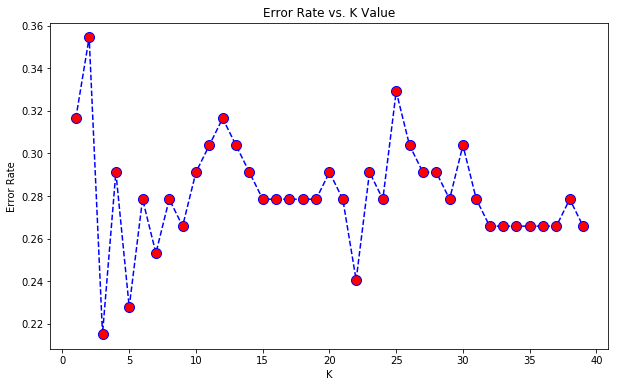

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [52]:
knn = KNeighborsClassifier(n_neighbors=34)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[ 3 21]
 [ 0 55]]


             precision    recall  f1-score   support

          0       1.00      0.12      0.22        24
          1       0.72      1.00      0.84        55

avg / total       0.81      0.73      0.65        79



In [48]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [49]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.810126582278481


In [50]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[ 3 21]
 [ 0 55]]


             precision    recall  f1-score   support

          0       1.00      0.12      0.22        24
          1       0.72      1.00      0.84        55

avg / total       0.81      0.73      0.65        79



In [55]:
da = pd.read_csv('student-mat.csv',delimiter=";")
da.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [56]:
da = da.drop(['school','age','address','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','schoolsup','famsup','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health'],axis=1)
da.head()

,sex,famsize,failures,paid,activities,absences,G1,G2,G3
0,F,GT3,0,no,no,6,5,6,6
1,F,GT3,0,no,no,4,5,5,6
2,F,LE3,3,yes,no,10,7,8,10
3,F,GT3,0,yes,yes,2,15,14,15
4,F,GT3,0,yes,no,4,6,10,10


In [57]:
da=da.drop('famsize',axis=1)

In [63]:
da.to_csv('student-intervention.csv', encoding='utf-8', index=False)

In [68]:
dt = df['passed']
dt.to_csv('student-results.csv', encoding='utf-8', index=False)